# Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df_1=pd.read_csv('gold_price_usd.csv')
df_1

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


View the first 5 rows

In [3]:
df_1.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


Check the information

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


Find the columns

In [5]:
df_1.columns

Index(['Date', 'USD (AM)'], dtype='object')

Rename USD (AM) to Price

In [6]:
df_1=df_1.rename(columns={'USD (AM)':'Price'})
df_1

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


In [7]:
df_1['Date']=pd.to_datetime(df_1['Date'])

In [8]:
df_1['Date'].dt.year
df_1['Date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
4713    8
4714    8
4715    8
4716    8
4717    9
Name: Date, Length: 4718, dtype: int64

In [9]:
df_1['Year']=df_1['Date'].dt.year
df_1['Month']=df_1['Date'].dt.month
df_1

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1
...,...,...,...,...
4713,2019-08-27,1531.85,2019,8
4714,2019-08-28,1541.75,2019,8
4715,2019-08-29,1536.65,2019,8
4716,2019-08-30,1526.55,2019,8


Check if there are any missing values in the dataset

In [10]:
df_1.isna().sum()

Date     0
Price    0
Year     0
Month    0
dtype: int64

Gather the basic statistical information about the dataset

In [11]:
df_1.describe()

,Price,Year,Month
count,4718.000000,4718.000000,4718.000000
mean,959.990812,2009.839339,6.456761
std,449.456217,5.392467,3.426217
min,256.700000,2001.000000,1.000000
25%,449.112500,2005.000000,3.000000
50%,1113.125000,2010.000000,6.000000
75%,1293.750000,2014.750000,9.000000
max,1896.500000,2019.000000,12.000000


See all the years and Months in our dataset

In [12]:
df_1['Year']

0       2001
1       2001
2       2001
3       2001
4       2001
        ... 
4713    2019
4714    2019
4715    2019
4716    2019
4717    2019
Name: Year, Length: 4718, dtype: int64

In [13]:
df_1['Month']

0       1
1       1
2       1
3       1
4       1
       ..
4713    8
4714    8
4715    8
4716    8
4717    9
Name: Month, Length: 4718, dtype: int64

# Visualization

Create a regression plot with x-axis as years and y-axis as Price

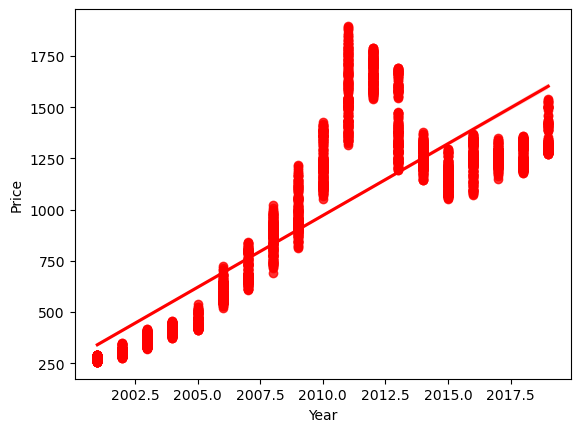

In [14]:
sns.regplot(x=df_1['Year'],y=df_1['Price'],color='red')
plt.show()

Plot a histplot to find the variation in price

<AxesSubplot:xlabel='Price', ylabel='Count'>

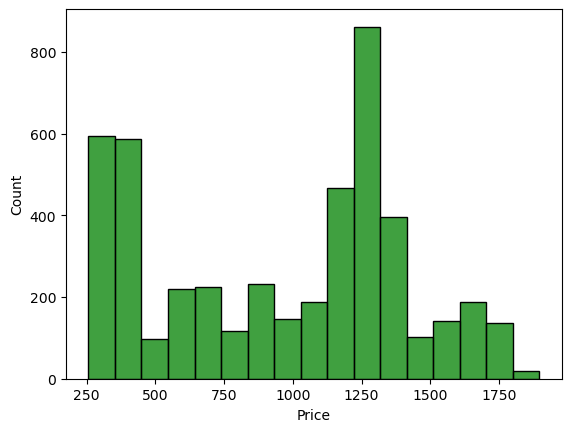

In [15]:
sns.histplot(df_1['Price'],color='green')

Assign year and price in x and y variables

In [16]:
x=df_1[['Year']]
y=df_1['Price']

In [17]:
x

,Year
0,2001
1,2001
2,2001
3,2001
4,2001
...,...
4713,2019
4714,2019
4715,2019
4716,2019


In [18]:
y

0        272.80
1        269.00
2        268.75
3        268.00
4        268.60
         ...   
4713    1531.85
4714    1541.75
4715    1536.65
4716    1526.55
4717    1523.35
Name: Price, Length: 4718, dtype: float64

Split the data into traning and testin set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

Train Data

In [21]:
from sklearn.linear_model import LinearRegression

Create Linear Regression Model

In [22]:
model=LinearRegression()

Train the Model

In [23]:
model.fit(x_train,y_train)

LinearRegression()

Check the Score of Our Model

In [24]:
model.score(x_train,y_train)

0.7048691960223041

Check the coefficient and Intercept

In [25]:
model.coef_

array([70.17366927])

In [26]:
model.intercept_

-140074.32374779374

Make Prediction with Test Data

In [27]:
prediction=model.predict(x_test)
prediction

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

Create a new dataframe with actual and predicted values with year(X_test) as index

In [28]:
y_test

962      425.50
403      307.80
3220    1335.75
1588     687.25
2065     924.75
         ...   
2237    1088.00
3262    1250.75
2817    1776.50
252      276.50
4441    1222.05
Name: Price, Length: 1416, dtype: float64

In [29]:
prediction

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

In [30]:
x_test

,Year
962,2004
403,2002
3220,2013
1588,2007
2065,2009
...,...
2237,2009
3262,2013
2817,2012
252,2001


In [31]:
years=x_test['Year'].to_numpy()
years

array([2004, 2002, 2013, ..., 2012, 2001, 2018], dtype=int64)

In [32]:
df_2=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
df_2['Year']=df_1['Year']


In [33]:
df_2.set_index('Year')

,Actual,Predicted
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


Check the mean absolute error, mean square error¶

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
mean_absolute_error(y_test,prediction)

186.2427389387367

In [36]:
mean_squared_error(y_test,prediction)

58032.97376893121

Predict the prices for the following years 2025,2026,2027,2028,2030

In [39]:
new_years=pd.DataFrame([2025,2026,2027,2028,2030])

In [45]:
new_pedicted=model.predict(new_years)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
new_pedicted

array([2027.35652254, 2097.53019181, 2167.70386108, 2237.87753035,
       2378.22486888])